In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
def generate_data(p = 400, n = 1000, sig_lev = 5, bkg_lev = 200):

  A = np.zeros((p, 1))
  A[0] = np.sqrt(sig_lev)

  B = np.zeros((p, 1))
  B[1] = np.sqrt(bkg_lev)


  epsilon = np.random.normal(0,1, size = (n,p))
  epsilon_2 = np.random.normal(0,1, size = (n,p))

  F = np.random.normal(0,1, size = (n,1))

  L = np.random.normal(0,1, size = (n,1))
  Lplus = np.random.normal(0,1, size = (n,1))

  X = F.dot(A.T) + L.dot(B.T) + epsilon
  Xplus = F.dot(A.T) + Lplus.dot(B.T) + epsilon_2

  S = X.T.dot(X)/n
  Splus = (X.T.dot(Xplus) + Xplus.T.dot(X))/2/n
  Stotal = (X.T.dot(X) + Xplus.T.dot(Xplus))/2/n
  Savg = (X + Xplus).T.dot(X + Xplus)/n/4
  return S, Splus, X.T.dot(Xplus)/n, Stotal, Savg, X, Xplus

def Generalized_eigenvector(A,B):
  eig_mat_B = np.linalg.eig(B)[1] #### (v_{B,1}, ...., v_{B,p})
  eig_mat_B_tild = np.dot(eig_mat_B, np.diag(np.linalg.eig(B)[0]**(-0.5)))
  A_tild = np.dot(eig_mat_B_tild.T, A).dot(eig_mat_B_tild)
  eig_mat_A = np.linalg.eig(A_tild)[1]
  eig_mat_A_val = np.linalg.eig(A_tild)[0]

  res = np.dot(eig_mat_B_tild, eig_mat_A)
  sorted_indices = np.argsort(eig_mat_A_val)[::-1]
  eig_mat_A_val = eig_mat_A_val[sorted_indices]
  res = res[:, sorted_indices]
  return res

def Generalized_eigenvector_topk(A,B):
  eig_mat_B = np.linalg.eig(B)[1] #### (v_{B,1}, ...., v_{B,p})
  eig_mat_B_tild = np.dot(eig_mat_B, np.diag(np.linalg.eig(B)[0]**(-0.5)))[:,:2]
  A_tild = np.dot(eig_mat_B_tild.T, A).dot(eig_mat_B_tild)
  eig_mat_A = np.linalg.eig(A_tild)[1]
  eig_mat_A_val = np.linalg.eig(A_tild)[0]

  res = np.dot(eig_mat_B_tild, eig_mat_A)
  sorted_indices = np.argsort(eig_mat_A_val)[::-1]
  eig_mat_A_val = eig_mat_A_val[sorted_indices]
  res = res[:, sorted_indices]
  return res

High dimensional fixed aspect ratio

In [24]:
n = 500
asp_ratio = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8]
res = [[0]*5 for _ in range(len(asp_ratio))]


def SinTheta(U,W):  #### U \in R^{p*k}
  tmp = np.matmul(U.T, W)
  _, S, _ = np.linalg.svd(tmp, full_matrices=True)
  return np.sin(np.arccos(min(S)))

def TheoryVal(asp_rat, min_sig):
  res = 1 - (1 - asp_rat/min_sig**2)/(1 + asp_rat/min_sig)
  return np.sqrt(res)

def generate_data_2(p = 400, n = 1000, sig_lev = [1,2,3,4,5], bkg_lev = [1,2,3,4,5]):

  A = np.zeros((p, 5))
  A[0][0] = np.sqrt(sig_lev[0])
  A[1][1] = np.sqrt(sig_lev[1])
  A[2][2] = np.sqrt(sig_lev[2])
  A[3][3] = np.sqrt(sig_lev[3])
  A[4][4] = np.sqrt(sig_lev[4])

  B = np.zeros((p, 5))
  B[-1][0] = np.sqrt(bkg_lev[0])
  B[-2][1] = np.sqrt(bkg_lev[1])
  B[-3][2] = np.sqrt(bkg_lev[2])
  B[-4][3] = np.sqrt(bkg_lev[3])
  B[-5][4] = np.sqrt(bkg_lev[4])


  epsilon = np.random.normal(0,1, size = (n,p))
  epsilon_2 = np.random.normal(0,1, size = (n,p))

  F = np.random.normal(0,1, size = (n,5))

  L = np.random.normal(0,1, size = (n,5))
  Lplus = np.random.normal(0,1, size = (n,5))

  X = F.dot(A.T) + L.dot(B.T) + epsilon
  Xplus = F.dot(A.T) + Lplus.dot(B.T) + epsilon_2

  S = X.T.dot(X)/n
  Splus = (X.T.dot(Xplus) + Xplus.T.dot(X))/2/n
  return S, Splus

def Generalized_eigenvector_topk_2(A,B):
  s = 10
  eig_mat_B = np.linalg.eig(B)[1][:,:s] #### (v_{B,1}, ...., v_{B,p})
  eig_mat_B_tild = np.dot(eig_mat_B, np.diag(np.linalg.eig(B)[0][:s]**(-0.5)))
  A_tild = np.dot(eig_mat_B_tild.T, A).dot(eig_mat_B_tild)
  A_tild = A_tild + np.eye(len(A_tild))*0
  eig_mat_A = np.linalg.eig(A_tild)[1]
  eig_mat_A_val = np.linalg.eig(A_tild)[0]

  res = np.dot(eig_mat_B, eig_mat_A)
  sorted_indices = np.argsort(eig_mat_A_val)[::-1]
  eig_mat_A_val = eig_mat_A_val[sorted_indices]
  res = res[:, sorted_indices]
  return res


for i in range(len(asp_ratio)):
  p = int(asp_ratio[i]*n)
  #### True space
  Sig = np.zeros((p, 5))
  Sig[0][0] = 1
  Sig[1][1] = 1
  Sig[2][2] = 1
  Sig[3][3] = 1
  Sig[4][4] = 1

  Bkg = np.zeros((p, 5))
  Bkg[-1][0] = 1
  Bkg[-2][1] = 1
  Bkg[-3][2] = 1
  Bkg[-4][3] = 1
  Bkg[-5][4] = 1

  sig_lev = [10,15,20,25,50]
  bkg_lev = [100,200,300,400,500]
  S, Splus= generate_data_2(p = p, n = n, sig_lev = sig_lev, bkg_lev = bkg_lev)

  #vec_xx = np.linalg.eig(S)[1].T[1]
  vec_cl = np.linalg.eig(Splus)[1].T[:5]
  #vec_unif = Generalized_eigenvector(Splus,S).T[0]
  vec_unif_1 = Generalized_eigenvector_topk_2(Splus,S).T[:5]

  #res[i][0] = abs(np.corrcoef(vec_xx, sig)[0][1])
  res[i][1] = SinTheta(vec_cl.T, Sig)
  #res[i][2] = abs(np.corrcoef(vec_unif, sig)[0][1])
  res[i][3] = SinTheta(vec_unif_1.T, Sig)
  res[i][4] = TheoryVal(p/n, 10)

Plot saved as PCA++Theory.pdf


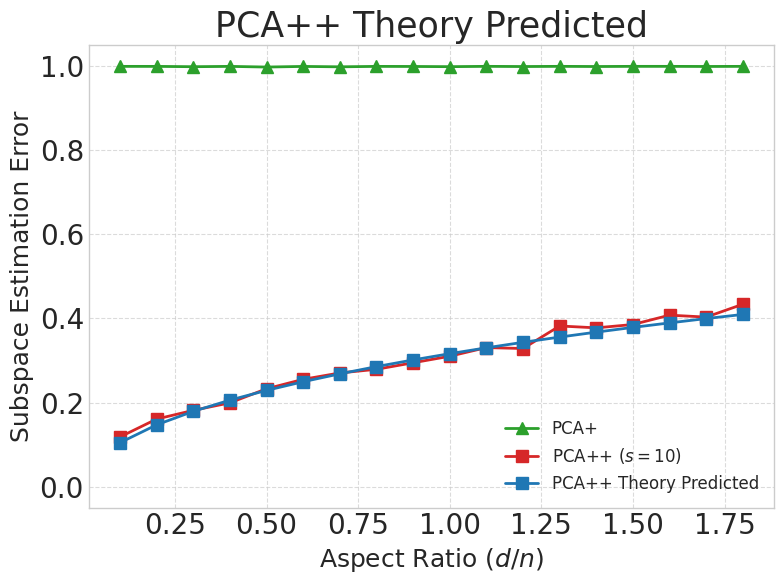

In [27]:
# --- 2. Set Professional Plotting Style (Optional but Recommended) ---
# You can use seaborn for a nicer default style, or customize matplotlib directly.
# import seaborn as sns
# sns.set_theme(style="whitegrid", palette="muted") # Example seaborn style

# Or customize matplotlib directly:
plt.style.use('seaborn-v0_8-whitegrid') # A clean, professional style
plt.rcParams.update({
    "font.family": "serif",  # Or "sans-serif"
    "font.serif": ["Times New Roman"], # Or your preferred serif font
    "font.size": 12,
    "axes.labelsize": 18,     # X 和 Y 轴标签的字体大小
    "axes.titlesize": 25,     # 图表标题的字体大小
    "xtick.labelsize": 20,    # X 轴刻度数字的字体大小
    "ytick.labelsize": 20,    # Y 轴刻度数字的字体大小
    "legend.fontsize": 12,
    "figure.figsize": (8, 6), # Adjust as needed
    "lines.linewidth": 2,
    "lines.markersize": 8,
    "axes.grid": True, # Ensure grid is on
    "grid.linestyle": '--',
    "grid.alpha": 0.7
})

# --- 3. Create the Plot ---
fig, ax = plt.subplots()

# Plot "Generalized eigenvalue solution" (Standard GES)
ax.plot(asp_ratio, [res[i][1] for i in range(len(res))],
        marker='^',  # Triangle marker
        linestyle='-',
        color='tab:green',  # A standard green
        label='PCA+')

# Plot "Generalized eigenvalue (Top 2) solution" (Truncated Constrained PCA)
ax.plot(asp_ratio, [res[i][3] for i in range(len(res))],
        marker='s',  # Square marker
        linestyle='-',
        color='tab:red',    # A standard red
        label=r'PCA++ ($s=10$)') # Or your specific method name

# Plot "Generalized eigenvalue (Top 2) solution" (Truncated Constrained PCA)
ax.plot(asp_ratio, [res[i][4] for i in range(len(res))],
        marker='s',  # Square marker
        linestyle='-',
        color='tab:blue',    # A standard red
        label='PCA++ Theory Predicted') # Or your specific method name

# --- 4. Add Labels, Title, Legend, and Grid ---
ax.set_xlabel(r'Aspect Ratio ($d/n$)')
ax.set_ylabel('Subspace Estimation Error') # Be specific
ax.set_title(r'PCA++ Theory Predicted')

# Set Y-axis limits if your data is bounded (e.g., 0 to 1 for cosine similarity)
ax.set_ylim(-0.05, 1.05) # Or a tighter range if appropriate, e.g., [0, 1.05]
# ax.set_xlim(left=0) # If aspect ratio starts from 0 or a small positive number

# Add a legend
ax.legend(loc='lower right') # 'best' tries to find a good spot, or specify e.g., 'lower left'

# Ensure grid is on (already set by plt.style.use if you used a style with grid)
# ax.grid(True, linestyle='--', alpha=0.7)

# --- 5. Fine-tuning and Saving ---
plt.tight_layout() # Adjusts plot to prevent labels from overlapping

# Save the figure
# Recommended formats for papers: PDF, EPS (vector formats for scalability)
# For presentations/web: PNG
file_name = "PCA++Theory.pdf"
plt.savefig(file_name, dpi=300, bbox_inches='tight') # dpi for raster, bbox_inches for tight layout
print(f"Plot saved as {file_name}")

# Display the plot (optional, if running in an interactive environment)
plt.show()

In [ ]:
n = 500
mult = 10
asp_ratio = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8]
res_2 = [[0]*5 for _ in range(len(asp_ratio))]


def SinTheta(U,W):  #### U \in R^{p*k}
  tmp = np.matmul(U.T, W)
  _, S, _ = np.linalg.svd(tmp, full_matrices=True)
  return np.sin(np.arccos(min(S)))

def TheoryVal_grow(asp_rat_grow):
  res = max(asp_rat_grow)/(1+max(asp_rat_grow))
  return np.sqrt(res)

def generate_data_2(p = 400, n = 1000, sig_lev = [1,2,3,4,5], bkg_lev = [1,2,3,4,5]):

  A = np.zeros((p, 5))
  A[0][0] = np.sqrt(sig_lev[0])
  A[1][1] = np.sqrt(sig_lev[1])
  A[2][2] = np.sqrt(sig_lev[2])
  A[3][3] = np.sqrt(sig_lev[3])
  A[4][4] = np.sqrt(sig_lev[4])

  B = np.zeros((p, 5))
  B[-1][0] = np.sqrt(bkg_lev[0])
  B[-2][1] = np.sqrt(bkg_lev[1])
  B[-3][2] = np.sqrt(bkg_lev[2])
  B[-4][3] = np.sqrt(bkg_lev[3])
  B[-5][4] = np.sqrt(bkg_lev[4])


  epsilon = np.random.normal(0,1, size = (n,p))
  epsilon_2 = np.random.normal(0,1, size = (n,p))

  F = np.random.normal(0,1, size = (n,5))

  L = np.random.normal(0,1, size = (n,5))
  Lplus = np.random.normal(0,1, size = (n,5))

  X = F.dot(A.T) + L.dot(B.T) + epsilon
  Xplus = F.dot(A.T) + Lplus.dot(B.T) + epsilon_2

  S = X.T.dot(X)/n
  Splus = (X.T.dot(Xplus) + Xplus.T.dot(X))/2/n
  return S, Splus

def Generalized_eigenvector_topk_2(A,B):
  s = 10
  eig_mat_B = np.linalg.eig(B)[1][:,:s] #### (v_{B,1}, ...., v_{B,p})
  eig_mat_B_tild = np.dot(eig_mat_B, np.diag(np.linalg.eig(B)[0][:s]**(-0.5)))
  A_tild = np.dot(eig_mat_B_tild.T, A).dot(eig_mat_B_tild)
  A_tild = A_tild + np.eye(len(A_tild))*0
  eig_mat_A = np.linalg.eig(A_tild)[1]
  eig_mat_A_val = np.linalg.eig(A_tild)[0]

  res = np.dot(eig_mat_B, eig_mat_A)
  sorted_indices = np.argsort(eig_mat_A_val)[::-1]
  eig_mat_A_val = eig_mat_A_val[sorted_indices]
  res = res[:, sorted_indices]
  return res


for i in range(len(asp_ratio)):
  p = int(asp_ratio[i]*n*mult)
  #### True space
  Sig = np.zeros((p, 5))
  Sig[0][0] = 1
  Sig[1][1] = 1
  Sig[2][2] = 1
  Sig[3][3] = 1
  Sig[4][4] = 1

  Bkg = np.zeros((p, 5))
  Bkg[-1][0] = 1
  Bkg[-2][1] = 1
  Bkg[-3][2] = 1
  Bkg[-4][3] = 1
  Bkg[-5][4] = 1

  sig_lev = [x*mult for x in [10,15,20,25,50]]
  bkg_lev = [x*mult for x in [100,200,300,400,500]]
  S, Splus= generate_data_2(p = p, n = n, sig_lev = sig_lev, bkg_lev = bkg_lev)

  #vec_xx = np.linalg.eig(S)[1].T[1]
  vec_cl = np.linalg.eig(Splus)[1].T[:5]
  #vec_unif = Generalized_eigenvector(Splus,S).T[0]
  vec_unif_1 = Generalized_eigenvector_topk_2(Splus,S).T[:5]

  #res[i][0] = abs(np.corrcoef(vec_xx, sig)[0][1])
  res_2[i][1] = SinTheta(vec_cl.T, Sig)
  #res[i][2] = abs(np.corrcoef(vec_unif, sig)[0][1])
  res_2[i][3] = SinTheta(vec_unif_1.T, Sig)
  res_2[i][4] = TheoryVal_grow([p/n/x for x in sig_lev])

In [ ]:
# --- 2. Set Professional Plotting Style (Optional but Recommended) ---
# You can use seaborn for a nicer default style, or customize matplotlib directly.
# import seaborn as sns
# sns.set_theme(style="whitegrid", palette="muted") # Example seaborn style

# Or customize matplotlib directly:
plt.style.use('seaborn-v0_8-whitegrid') # A clean, professional style
plt.rcParams.update({
    "font.family": "serif",  # Or "sans-serif"
    "font.serif": ["Times New Roman"], # Or your preferred serif font
    "font.size": 12,
    "axes.labelsize": 18,     # X 和 Y 轴标签的字体大小
    "axes.titlesize": 25,     # 图表标题的字体大小
    "xtick.labelsize": 20,    # X 轴刻度数字的字体大小
    "ytick.labelsize": 20,    # Y 轴刻度数字的字体大小
    "legend.fontsize": 12,
    "figure.figsize": (8, 6), # Adjust as needed
    "lines.linewidth": 2,
    "lines.markersize": 8,
    "axes.grid": True, # Ensure grid is on
    "grid.linestyle": '--',
    "grid.alpha": 0.7
})

# --- 3. Create the Plot ---
fig, ax = plt.subplots()

# Plot "Generalized eigenvalue solution" (Standard GES)
ax.plot(asp_ratio, [res_2[i][1] for i in range(len(res))],
        marker='^',  # Triangle marker
        linestyle='-',
        color='tab:green',  # A standard green
        label='PCA+')

# Plot "Generalized eigenvalue (Top 2) solution" (Truncated Constrained PCA)
ax.plot(asp_ratio, [res_2[i][3] for i in range(len(res))],
        marker='s',  # Square marker
        linestyle='-',
        color='tab:red',    # A standard red
        label=r'PCA++ ($s=10$)') # Or your specific method name

# Plot "Generalized eigenvalue (Top 2) solution" (Truncated Constrained PCA)
ax.plot(asp_ratio, [res_2[i][4] for i in range(len(res))],
        marker='s',  # Square marker
        linestyle='-',
        color='tab:blue',    # A standard red
        label='PCA++ Theory Predicted') # Or your specific method name

# --- 4. Add Labels, Title, Legend, and Grid ---
ax.set_xlabel(r'Aspect Ratio ($d/n$)')
ax.set_ylabel('Subspace Estimation Error') # Be specific
ax.set_title(r'PCA++ Theory Predicted')

# Set Y-axis limits if your data is bounded (e.g., 0 to 1 for cosine similarity)
ax.set_ylim(-0.05, 1.05) # Or a tighter range if appropriate, e.g., [0, 1.05]
# ax.set_xlim(left=0) # If aspect ratio starts from 0 or a small positive number

# Add a legend
ax.legend(loc='lower right') # 'best' tries to find a good spot, or specify e.g., 'lower left'

# Ensure grid is on (already set by plt.style.use if you used a style with grid)
# ax.grid(True, linestyle='--', alpha=0.7)

# --- 5. Fine-tuning and Saving ---
plt.tight_layout() # Adjusts plot to prevent labels from overlapping

# Save the figure
# Recommended formats for papers: PDF, EPS (vector formats for scalability)
# For presentations/web: PNG
file_name = "PCA++_grow.pdf"
plt.savefig(file_name, dpi=300, bbox_inches='tight') # dpi for raster, bbox_inches for tight layout
print(f"Plot saved as {file_name}")

# Display the plot (optional, if running in an interactive environment)
plt.show()